<a href="https://colab.research.google.com/github/mjgpinheiro/Econophysics/blob/main/Modified_BS_exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

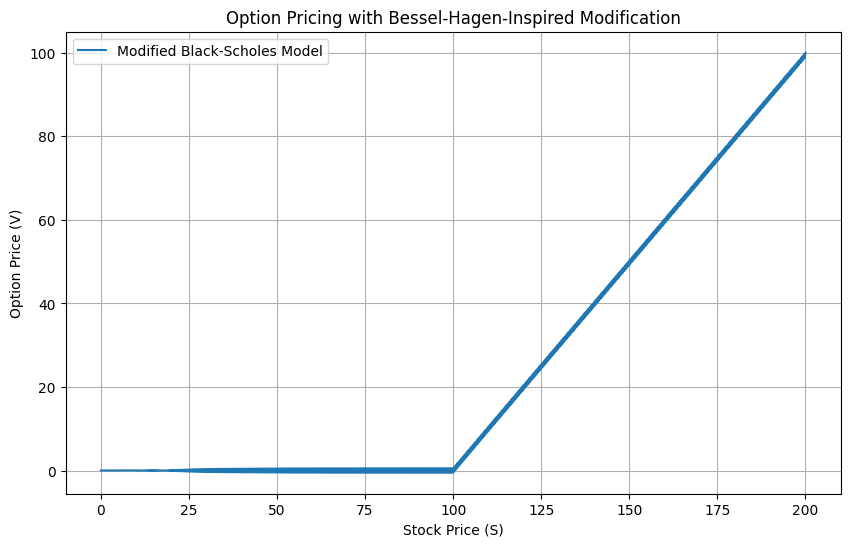

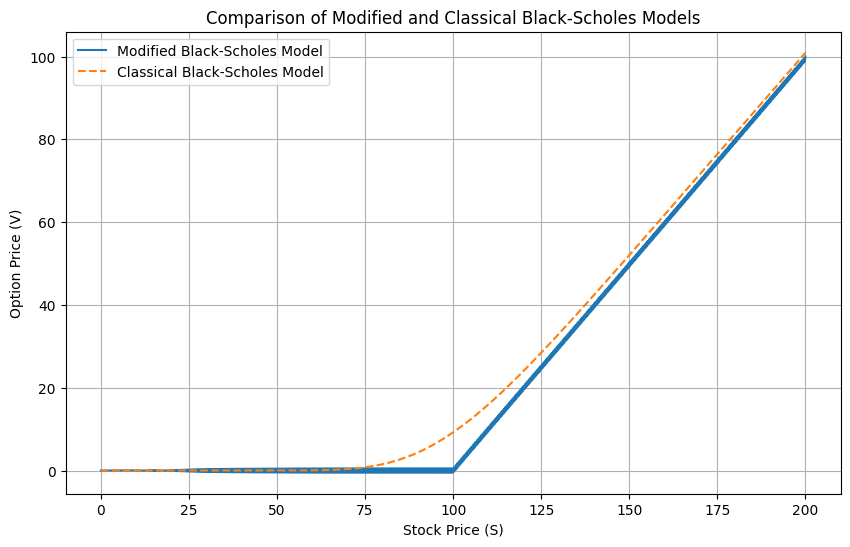

TypeError: float() argument must be a string or a real number, not 'ellipsis'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.linalg import solve

# Parameters
S_min = 0.01  # Minimum stock price (avoid zero)
S_max = 200  # Maximum stock price
K = 100  # Strike price
T = 1  # Time to maturity (in years)
r = 0.05  # Risk-free rate
q = 0.02  # Dividend yield
sigma_base = 0.2  # Base volatility
mu_factor = 0.01  # Symmetry-based correction term coefficient
N = 1000  # Number of stock price steps
M = 1000  # Number of time steps

# Grid setup
dS = (S_max - S_min) / N
dt = T / M
S = np.linspace(S_min, S_max, N + 1)
t = np.linspace(0, T, M + 1)

# Symmetry-based correction term
def mu(S, t):
    return mu_factor * S * np.exp(-t)

# Stochastic volatility function
def sigma(S, t):
    return sigma_base * (1 + 0.1 * np.sin(2 * np.pi * t))  # Example stochastic volatility

# Crank-Nicolson setup
A = np.zeros((N - 1, N - 1))
B = np.zeros((N - 1, N - 1))
b = np.zeros(N - 1)

for j in range(M - 1, -1, -1):
    for i in range(1, N):
        s = S[i]
        vol = sigma(s, t[j])
        mu_correction = mu(s, t[j])

        alpha = 0.25 * dt * (vol**2 * i**2 - (r - q) * i)
        beta = -0.5 * dt * (vol**2 * i**2 + (r - q))
        gamma = 0.25 * dt * (vol**2 * i**2 + (r - q) * i)

        # Third derivative term
        delta = mu_correction * dt * i**3 / (2 * dS**3)

        if i > 1:
            A[i - 1, i - 2] = -alpha - delta
            B[i - 1, i - 2] = alpha + delta
        A[i - 1, i - 1] = 1 - beta
        B[i - 1, i - 1] = 1 + beta
        if i < N - 1:
            A[i - 1, i] = -gamma + delta
            B[i - 1, i] = gamma - delta

# Terminal condition (European call option)
V = np.maximum(S - K, 0)
V_old = V.copy()

# Time-stepping using Crank-Nicolson
for j in range(M - 1, -1, -1):
    b[:] = np.dot(B, V[1:N])
    V[1:N] = solve(A, b)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(S, V, label='Modified Black-Scholes Model')
plt.xlabel('Stock Price (S)')
plt.ylabel('Option Price (V)')
plt.title('Option Pricing with Bessel-Hagen-Inspired Modification')
plt.legend()
plt.grid()
plt.show()

# Backtesting framework
def black_scholes_price(S, K, T, r, q, sigma):
    # Handle S = 0 case
    if S == 0:
        return 0
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Compare with classical Black-Scholes
classical_prices = np.array([black_scholes_price(s, K, T, r, q, sigma_base) for s in S])

plt.figure(figsize=(10, 6))
plt.plot(S, V, label='Modified Black-Scholes Model')
plt.plot(S, classical_prices, label='Classical Black-Scholes Model', linestyle='--')
plt.xlabel('Stock Price (S)')
plt.ylabel('Option Price (V)')
plt.title('Comparison of Modified and Classical Black-Scholes Models')
plt.legend()
plt.grid()
plt.show()

###########
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import ttest_rel

# Example: Compare model predictions with market data
market_prices = np.array([...])  # Actual market prices
classical_predictions = np.array([...])  # Classical model predictions
modified_predictions = np.array([...])  # Modified model predictions

# Calculate errors
classical_mse = mean_squared_error(market_prices, classical_predictions)
modified_mse = mean_squared_error(market_prices, modified_predictions)

classical_mae = mean_absolute_error(market_prices, classical_predictions)
modified_mae = mean_absolute_error(market_prices, modified_predictions)

print(f"Classical Model - MSE: {classical_mse}, MAE: {classical_mae}")
print(f"Modified Model - MSE: {modified_mse}, MAE: {modified_mae}")

# Perform paired t-test
t_stat, p_value = ttest_rel(classical_predictions - market_prices, modified_predictions - market_prices)
print(f"Paired t-test: t-statistic = {t_stat}, p-value = {p_value}")

# Analyze residuals
residuals_classical = classical_predictions - market_prices
residuals_modified = modified_predictions - market_prices

plt.figure(figsize=(10, 6))
plt.scatter(market_prices, residuals_classical, label='Classical Model Residuals', alpha=0.5)
plt.scatter(market_prices, residuals_modified, label='Modified Model Residuals', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Market Prices')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.legend()
plt.show()